# Практична №5. Основи TensorFlow та Deep Learning

## 1. Встановлення Tensorflow

Є

## 2. Ознайомлення з Tensorflow
Вивчіть основні концепції TensorFlow, такі як тензори, операції та графи обчислень.
Створіть тензори різних типів та виконайте над ними операції.

In [123]:
import tensorflow as tf

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

from sklearn.model_selection import train_test_split

<span style="color:lightgreen">__Тензори__</span> - це базові об'єкти даних в TensorFlow. Вони подібні до масивів чи матриць, але можуть мати будь-яку кількість вимірів. Тензори можуть бути константами або змінними.

In [124]:
# Створення константного тензора
tensor_constant = tf.constant([1, 2, 3])

# Створення змінного тензора
tensor_variable = tf.Variable([1, 2, 3])

In [125]:
# Matrix 1 by 1 with data float32 type
x = tf.constant(4, shape=(1,1), dtype=tf.float32)
# Matrix 3 by 3
x = tf.constant([[1,2,3], [4,5,6], [7,8,9]])
# Matrix of ones 3 by 3
x = tf.ones((3,3))
# Matrix of zeroes 2 by 2
x = tf.zeros((2,2))
# Matrix of eye, main diagonal has ones, and other fields have zeroes
x = tf.eye(3)
# Random values
x = tf.random.normal((3,3), mean=0, stddev=1)
x = tf.random.uniform((3,3), minval=0, maxval=10)
x = tf.range(9)
x = tf.range(start=1, limit=10, delta=2)
# To convert between different types 
x = tf.cast(x, dtype=tf.float64)
print(x)

tf.Tensor([1. 3. 5. 7. 9.], shape=(5,), dtype=float64)


<span style="color:lightgreen">__Операції__</span> в TensorFlow представляють собою дії, які ви виконуєте над тензорами

In [126]:
# Приклад операції матричного множення
x = tf.constant([[1, 2], [3, 4]])
y = tf.constant([[5, 6], [7, 8]])

# Summ
sum = tf.add(x, y)
# or sum = x + y
print(sum,'\n')

# Subtract
sub = tf.subtract(x, y)
print(sub,'\n')

# Division
divv = tf.divide(x, y)
# or divv = x / y
print(divv,'\n')

# Multiply
mul = tf.multiply(x, y)
# or mul = x * y
print(mul, '\n')

# Tensordot: Multiply and then add all numbers
dot = tf.tensordot(x, y, axes=1)
dot = tf.reduce_sum(x*y, axis=0)
print(dot, '\n')

z = x**5
print(z, '\n')

tf.Tensor(
[[ 6  8]
 [10 12]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[-4 -4]
 [-4 -4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[0.2        0.33333333]
 [0.42857143 0.5       ]], shape=(2, 2), dtype=float64) 

tf.Tensor(
[[ 5 12]
 [21 32]], shape=(2, 2), dtype=int32) 

tf.Tensor([26 44], shape=(2,), dtype=int32) 

tf.Tensor(
[[   1   32]
 [ 243 1024]], shape=(2, 2), dtype=int32) 



In [127]:
# Multiplying matrixes
x = tf.random.normal((2, 3))
y = tf.random.normal((3, 4))
print(x, '\n')
print(y, '\n')

z = tf.matmul(x, y)
# or z = x @ y
print(z)

tf.Tensor(
[[-1.2985559e-03 -9.8288655e-01 -9.1419733e-01]
 [-7.2255838e-01 -1.2175164e+00 -1.3325899e+00]], shape=(2, 3), dtype=float32) 

tf.Tensor(
[[ 0.516274   -0.0375652  -0.6208636   0.417308  ]
 [ 0.40779498  0.80499023 -0.4349617  -2.6940448 ]
 [-0.20866764 -0.8336522   0.47482488 -0.88722664]], shape=(3, 4), dtype=float32) 

tf.Tensor(
[[-0.2107232  -0.02904266 -0.00575942  3.4584987 ]
 [-0.59146684  0.15797073  0.34543645  4.160824  ]], shape=(2, 4), dtype=float32)


<span style="color:lightgreen">__Графи обчислень.__</span> У TensorFlow обчислення представлені у вигляді графів, де вузли представляють операції, а ребра - тензори, які передають дані між цими операціями. Граф обчислень описує всю послідовність операцій, які потрібно виконати.

## 3. Побудова моделі для <span style="color:lightgreen">регресії</span>:
Використайте згенерований у лабораторній роботі 2 набір даних для задачі регресії, включаючи ознаки та відповідні значення цільової змінної.
Створіть та скомпілюйте модель нейронної мережі для регресії з використанням TensorFlow.
Виберіть функцію втрати та оптимізатор для моделі та навчіть її на підготовленому наборі даних.
Оцініть результати навчання та відобразіть їх графічно.
Порівняйте з результатами, отриманими у лабораторній роботі 2.

In [128]:
# Генеруємо набір даних для регресії
X, y = make_regression(n_samples=1000,    # Кількість екземплярів
                       n_features=5,      # Кількість параметрів
                       n_informative=3,   # Визначає кількість інформативних параметрів в наборі даних
                       noise=17,         # Рівень шуму
                       random_state=42)

df = pd.DataFrame(data=X, columns=[f'Feature_{i+1}' for i in range(5)])
df['Target'] = y

# Зберігаємо набір даних у CSV-файл
df.to_csv('data_for_part1.csv', index=False)

In [129]:
# Завантаження даних
data = pd.read_csv('data_for_part1.csv')

# Перегляд перших декількох рядків даних
print("---Перегляд перших декількох рядків даних---")
print(data.head(), "\n")

# Вивести інформацію про дані, такі як кількість рядків, стовпців і типи даних
print("---Вивід інформації про дані: к-сті рядків, стовпців, типу даних---")
print(data.info(), "\n")

# Вивести основні статистичні показники даних
print("---Основні статистичні показники даних---")
print(data.describe(), "\n")

---Перегляд перших декількох рядків даних---
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5     Target
0  -0.735201   1.798725  -1.095519   1.656208  -0.880754  77.812223
1  -1.613561  -1.371901  -0.172946   1.471170   1.711708 -23.236355
2   0.651391   0.954002   0.570891  -0.315269   1.135566  60.810932
3  -1.350556  -0.687014  -0.475795  -0.075871  -0.826112 -53.744184
4   1.554160   0.342338  -0.530971   0.853976  -0.335138  -0.138741 

---Вивід інформації про дані: к-сті рядків, стовпців, типу даних---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  1000 non-null   float64
 1   Feature_2  1000 non-null   float64
 2   Feature_3  1000 non-null   float64
 3   Feature_4  1000 non-null   float64
 4   Feature_5  1000 non-null   float64
 5   Target     1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB
None 

---О

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sequential API allows only one input to one output. Very convenient, not very flexible 
# Визначимо модель
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=(5,), activation='linear')
])

# Компілюємо модель, тут обираємо функцію втрати
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mse'])

# Виведемо інформацію про модель
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [131]:
# Навчимо модель
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

Training Loss: 316.40411376953125, Training MSE: 316.40411376953125
Test Loss: 277.9683532714844, Test MSE: 277.9683532714844


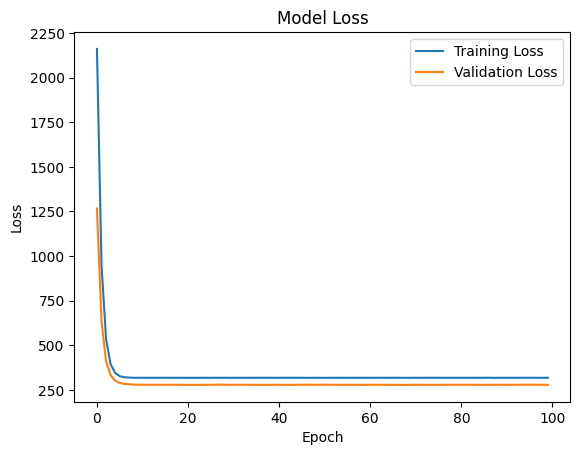

In [132]:
# Оцінимо результати навчання
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

print(f'Training Loss: {train_loss[0]}, Training MSE: {train_loss[1]}')
print(f'Test Loss: {test_loss[0]}, Test MSE: {test_loss[1]}')

# Візуалізуємо результати навчання
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# чим значення менші, тим краще

<span style="color:lightgreen">__Висновки.__</span> Порівнявши значення MSE з другої лабораторної (278.19893450733974) та цієї практичної (278.22039794921875), можемо бачити, що вони майже ідентичні

## 4. Побудова моделі для <span style="color:lightgreen">класифікації:</span>
Використайте згенерований у ллабораторній роботі №3 набір даних для задачі бінарної класифікації, включаючи ознаки та мітки класів.
Створіть та скомпілюйте модель нейронної мережі для класифікації з використанням TensorFlow.
Виберіть функцію втрати, оптимізатор та метрики для моделі та навчіть її на підготовленому наборі даних.
Оцініть результати навчання та відобразіть їх графічно.
Порівняйте з результатами, отриманими у лабораторній роботі 3.

In [201]:
from sklearn.datasets import make_classification

from sklearn.metrics import accuracy_score, confusion_matrix

In [202]:
# Згенеруємо набір даних для бінарної класифікації
X, y = make_classification(
    n_samples=1000,  # Кількість прикладів у наборі даних
    n_features=2,    # Кількість ознак
    n_informative=2, # Кількість інформативних ознак
    n_redundant=0,   # Кількість зайвих ознак
    n_clusters_per_class=1, # Кількість кластерів на клас
    random_state=42   # Випадковий стан для відтворюваності
)

# Об'єднаємо ознаки та мітки у один DataFrame
df = pd.DataFrame(data=np.c_[X, y], columns=['Feature1', 'Feature2', 'Target'])

# Збережемо дані у CSV файл
df.to_csv('data_for_part2.csv', index=False)

In [203]:
# Завантаження даних
data = pd.read_csv('data_for_part2.csv')

# Перегляд перших декількох рядків даних
print("---Перегляд перших декількох рядків даних---")
print(data.head(), "\n")

# Вивести інформацію про дані, такі як кількість рядків, стовпців і типи даних
print("---Вивід інформації про дані: к-сті рядків, стовпців, типу даних---")
print(data.info(), "\n")

# Вивести основні статистичні показники даних
print("---Основні статистичні показники даних---")
print(data.describe(), "\n")

---Перегляд перших декількох рядків даних---
   Feature1  Feature2  Target
0  0.601034  1.535353     1.0
1  0.755945 -1.172352     0.0
2  1.354479 -0.948528     0.0
3  3.103090  0.233485     0.0
4  0.753178  0.787514     1.0 

---Вивід інформації про дані: к-сті рядків, стовпців, типу даних---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  1000 non-null   float64
 1   Feature2  1000 non-null   float64
 2   Target    1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB
None 

---Основні статистичні показники даних---
          Feature1     Feature2       Target
count  1000.000000  1000.000000  1000.000000
mean      1.025840    -0.012693     0.499000
std       1.071457     1.225378     0.500249
min      -2.472718    -2.850971     0.000000
25%       0.307209    -0.984268     0.000000
50%       1.023750    -0.102945     0.000000


In [204]:
# Розділення на ознаки (X) та цільову змінну (y)
X = data.drop('Target', axis=1)
y = data['Target']

# Розділення на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [205]:
# Визначимо модель
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=(2,), activation='sigmoid')
])

# Компілюємо модель
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Виведемо інформацію про модель
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [206]:
# Навчимо модель
history = model.fit(X_train, y_train, epochs=90, validation_data=(X_test, y_test), verbose=0)

Training Loss: 0.29445281624794006, Training Accuracy: 0.9075000286102295
Test Loss: 0.32606956362724304, Test Accuracy: 0.8999999761581421


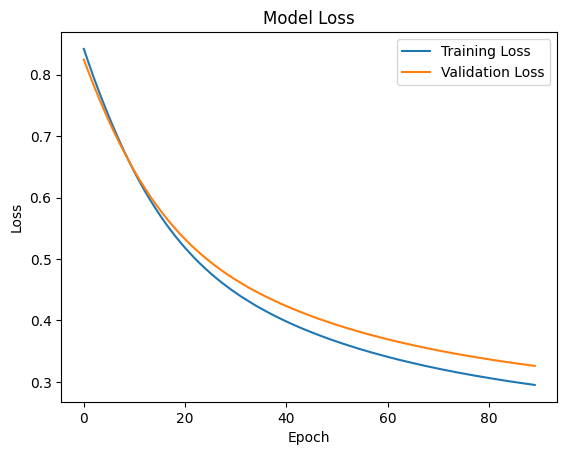

In [207]:
# Оцінимо результати навчання
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Training Loss: {train_loss}, Training Accuracy: {train_accuracy}')
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Візуалізуємо результати навчання
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

<span style="color:lightgreen">__Висновки.__</span> При порівнянні точності між третьою лабораторною роботою (90-93%) і даною практичною (приблизно 90%), доходимо до висновку, що значення приблизно однакові.